In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes_data=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Designing a ML model/Pima_diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [5]:
features=list(diabetes_data.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
from sklearn.decomposition import PCA
def apply_pca(n):
    pca=PCA(n_components=n)
    x_new=pca.fit_transform(diabetes_data[features])
    
    return pca,pd.DataFrame(x_new)

In [10]:
pca_obj,_=apply_pca(8)#we have 8 features

In [11]:
print("explained Variance:",pca_obj.explained_variance_ratio_)

explained Variance: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [12]:
sum(pca_obj.explained_variance_ratio_)

1.0000000000000002

the below graph will tell how many feature is optimal

Text(0, 0.5, 'Cumulative variance')

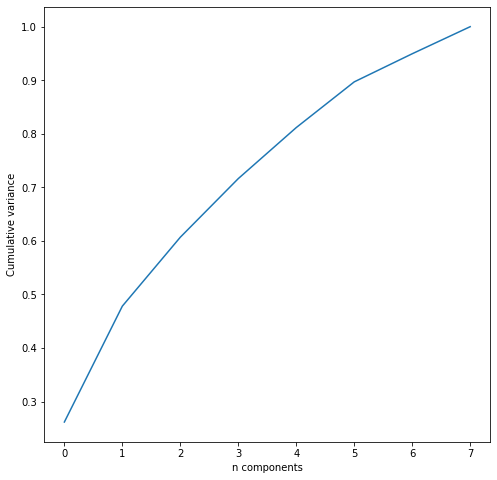

In [13]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('Cumulative variance')

In [14]:
y=diabetes_data['Outcome']

In [15]:
_,x_new=apply_pca(4)

In [16]:
x_new.sample(10)

,0,1,2,3
7,-2.149806,0.855902,1.254642,-0.638269
650,-1.314557,-1.311073,-0.080859,-0.491566
133,0.229605,0.762887,-1.353530,0.888384
735,-0.513678,-0.516368,-0.967800,0.093229
611,1.083683,-0.155080,1.534949,-0.740061
724,-0.559553,0.969356,-0.982596,-0.121499
309,0.952999,-1.078361,0.802991,0.552179
493,0.732549,0.431888,1.292602,1.562546
762,-2.014177,1.499662,-0.214682,-0.196543
760,-0.927087,-1.240901,0.042728,1.194761


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear').fit(x_train,y_train)

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [24]:
accuracy_score(y_test,y_pred)



0.7272727272727273

In [25]:
precision_score(y_test,y_pred)

0.7096774193548387

In [26]:
recall_score(y_test,y_pred)

0.4